In [12]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
test_images = np.load("test_images.npy", allow_pickle=True)
train_images = np.load("train_images.npy", allow_pickle=True)
test_labels = np.load("test_labels.npy", allow_pickle=True)
train_labels = np.load("train_labels.npy", allow_pickle=True)

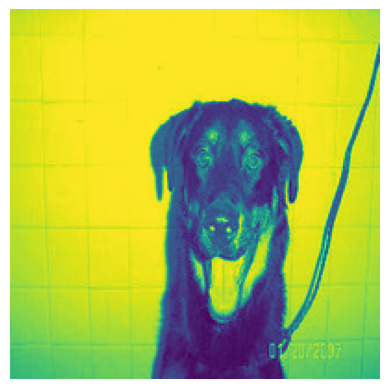

In [3]:
showcase_image = train_images[0]
plt.imshow(showcase_image)
plt.axis('off')
plt.show()

torch.Size([1, 1, 198, 198])


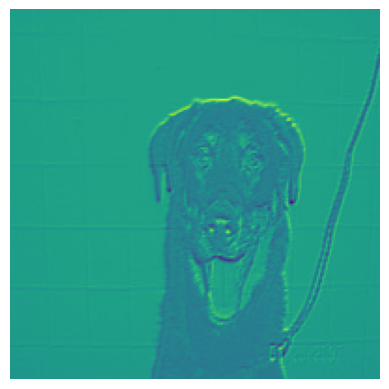

In [19]:
showcase_image_t = torch.from_numpy(showcase_image).unsqueeze(0).unsqueeze(1)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
conv_image = conv(showcase_image_t)
showcase_image_2 = conv_image[0][0].detach().numpy()
plt.imshow(showcase_image_2)
plt.axis('off')
plt.show()

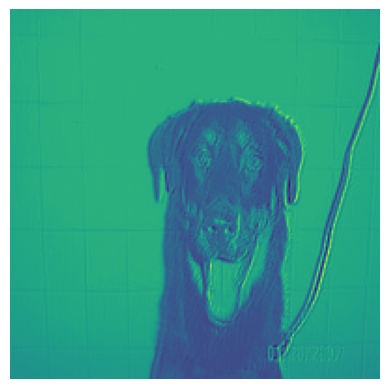

In [5]:
relu = nn.ReLU()
relu_image = relu(conv_image)
showcase_image_3 = relu_image[0][0].detach().numpy()
plt.imshow(showcase_image_3)
plt.axis('off')
plt.show()

(66, 66)


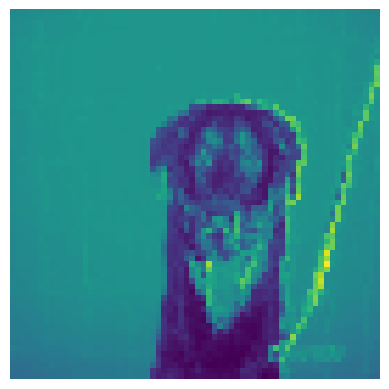

In [6]:
pool = nn.MaxPool2d(3)
pool_image = pool(relu_image)
showcase_image_4 = pool_image[0][0].detach().numpy()
print(showcase_image_4.shape)
plt.imshow(showcase_image_4)
plt.axis('off')
plt.show()

In [28]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),
            
            nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            nn.Flatten(),
            nn.Linear(900, 1),
            nn.Softmax(),
            nn.Linear(1,1)
        )

    def forward(self, x):
        return self.layers(x)

In [8]:
device = "cpu"

In [29]:
model = Model().to(device)
model

Model(
  (layers): Sequential(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=900, out_features=1, bias=True)
    (11): Softmax(dim=None)
    (12): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [30]:
def to_tensor(batch):
    data = []
    for i in batch:
        data.append(i.tolist())
    return torch.tensor(data).unsqueeze(1)

In [ ]:
model.train()

for i in trange(10):
    starting_point = 25*i
    end_point = starting_point+25

    
    X = to_tensor(train_images[starting_point:end_point])
    y = to_tensor(train_images[starting_point:end_point])
    X, y = X.to(device), y.to(device)
    print(X.shape)
    pred = model(X)
    print(pred)
        
    """
        

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

        """
